In [5]:
import napari
import numpy as np
from napari.layers.shapes.shapes import Shapes

# Create a napari viewer
viewer = napari.Viewer()

def print_event(event):
    if event is not None:
        if event.action == 'add':
            print('added')
            # Access and modify the properties attribute
            layer = event.source
            layer.properties['custom_property'] = 'custom_value'

        elif event.action == 'remove':
            print('removed')

# Connect the function to all shapes layers in the viewer
def connect_to_all_shapes_layers(event):
    layer = event.source[event.index]
    if event is not None and isinstance(layer, Shapes):
        layer.events.data.connect(print_event)

# Connect the function to any new layers added to the viewer
viewer.layers.events.inserted.connect(connect_to_all_shapes_layers)

# Add three random triangles with random properties to the same layer
shapes_data = []
for _ in range(3):
    vertices = np.random.rand(3, 2) * 512  # Random vertices for a triangle
    properties = {'random_property': np.random.randint(0, 10)}
    shapes_data.append({'data': vertices, 'type': 'polygon', 'properties': properties})

viewer.add_shapes(shapes_data)

# Open the napari viewer
napari.run()


IndexError: tuple index out of range

In [7]:
np.array([], dtype="object")

array([], dtype=object)

In [2]:
import napari
import numpy as np
from napari.layers.shapes.shapes import Shapes

# Create a napari viewer
viewer = napari.Viewer()

def print_event(event):
    if event is not None:
        if event.action == 'add':
            print('added')
            # Access and modify the properties attribute
            layer = event.source
            layer.properties['custom_property'] = 'custom_value'

        elif event.action == 'remove':
            print('removed')

        print(layer.properties)

# Connect the function to all shapes layers in the viewer
def connect_to_all_shapes_layers(event):
    layer = event.source[event.index]
    if event is not None and isinstance(layer, Shapes):
        layer.events.data.connect(print_event)

# Connect the function to any new layers added to the viewer
viewer.layers.events.inserted.connect(connect_to_all_shapes_layers)

# Open the napari viewer
napari.run()


added
{}
added
{}
added
{}


In [1]:
import sys 
import traceback

def my_excepthook(type_, value, trace_back):
    traceback.print_exception(type, value, trace_back, file=sys.stdout)

sys.excepthook = my_excepthook

In [2]:
import napari
import numpy as np
from napari.layers import Image
from magicgui import magicgui

@magicgui(image={'label': 'Pick an Image'})
def my_widget(image: Image):
    raise ValueError("Error")
    print('hello')

viewer = napari.view_image(np.random.rand(64, 64), name="My Image")
viewer.window.add_dock_widget(my_widget)

In [7]:
import napari
import numpy as np
from skimage import data

# create the list of polygons
triangle = np.array([[11, 13], [111, 113], [22, 246]])

person = np.array([[505, 60], [402, 71], [383, 42], [251, 95], [212, 59],
                   [131, 137], [126, 187], [191, 204], [171, 248], [211, 260],
                   [273, 243], [264, 225], [430, 173], [512, 160]])

building = np.array([[310, 382], [229, 381], [209, 401], [221, 411],
                     [258, 411], [300, 412], [306, 435], [268, 434],
                     [265, 454], [298, 461], [307, 461], [307, 507],
                     [349, 510], [352, 369], [330, 366], [330, 366]])

polygons = [triangle, person, building]

# add the image
viewer = napari.view_image(data.camera(), name='photographer')

# add the polygons
shapes_layer = viewer.add_shapes(polygons,
                                 properties={
                                     'id': list("ABC")
                                     },
                                 shape_type='polygon', 
                                 edge_width=5,
                                 edge_color='coral', 
                                 face_color='royalblue')

In [6]:
shapes_layer.properties

{'id': array(['A', 'B', 'C'], dtype=object)}

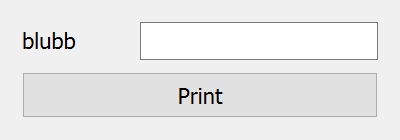

asfd


In [27]:
from magicgui import magicgui

@magicgui(
    call_button="Print",
    string={'label': 'blubb'}
)
def widget_demo(
    string=""
):
    if string != "":
        print(string)
    widget_demo.string.value = ""

widget_demo.show(run=True)

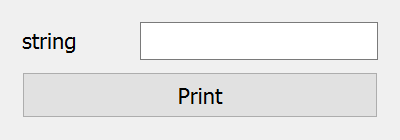

sfdf


In [30]:
from magicgui import magicgui

@magicgui(
    call_button="Print",
)
def widget_demo(
    string=""
):
    if string != "":
        print(string)
        string = ""
        
    widget_demo.string.value = ""

widget_demo.show(run=True)

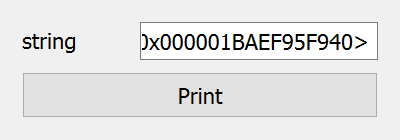

In [23]:
from magicgui import magicgui

def _set_string():
    return ""

@magicgui(
    call_button="Print",
    string={'value': _set_string}
)
def widget_demo(
    string=""
):
    if string != "":
        print(string)
    

widget_demo.show(run=True)

In [3]:
import napari
from qtpy.QtWidgets import QVBoxLayout, QSlider, QLabel, QWidget
import numpy as np

def create_points_layer(viewer, num_points):
    # Generate random points
    points = np.random.rand(num_points, 2) * 512

    # Add points layer to the viewer
    points_layer = viewer.add_points(points, size=5, face_color='red', symbol='o', name='points')
    viewer.reset_view()

def update_points_layer(value):
    # Update the number of points when the slider is changed
    create_points_layer(viewer, value)

# Create a Napari viewer
viewer = napari.Viewer()

# Create a Qt widget with a slider
widget = QWidget()
layout = QVBoxLayout()

slider_label = QLabel("Number of Points:")
layout.addWidget(slider_label)

slider = QSlider()
slider.setOrientation(1)  # 1 means vertical orientation
slider.setRange(1, 100)
slider.setValue(10)  # Default number of points
layout.addWidget(slider)

widget.setLayout(layout)

# Connect the slider's valueChanged signal to the update_points_layer function
slider.valueChanged.connect(update_points_layer)

# Add the widget to the Napari viewer
viewer.window.add_dock_widget(widget, area='right')

# Initialize the viewer with a default number of points
create_points_layer(viewer, slider.value())

# Start the Napari event loop
napari.run()


In [4]:
import napari
from qtpy.QtWidgets import QVBoxLayout, QSlider, QLabel, QWidget
import numpy as np

def create_or_update_points_layer(viewer, num_points):
    # Check if 'points' layer already exists
    if 'points' in viewer.layers:
        # Update the existing points layer
        viewer.layers['points'].data = np.random.rand(num_points, 2) * 512
    else:
        # Create a new points layer
        points = np.random.rand(num_points, 2) * 512
        viewer.add_points(points, size=5, face_color='red', symbol='o', name='points')

    viewer.reset_view()

def update_points_layer(value):
    # Update the points layer when the slider is changed
    create_or_update_points_layer(viewer, value)

# Create a Napari viewer
viewer = napari.Viewer()

# Create a Qt widget with a slider
widget = QWidget()
layout = QVBoxLayout()

slider_label = QLabel("Number of Points:")
layout.addWidget(slider_label)

slider = QSlider()
slider.setOrientation(1)  # 1 means vertical orientation
slider.setRange(1, 100)
slider.setValue(10)  # Default number of points
layout.addWidget(slider)

widget.setLayout(layout)

# Connect the slider's valueChanged signal to the update_points_layer function
slider.valueChanged.connect(update_points_layer)

# Add the widget to the Napari viewer
viewer.window.add_dock_widget(widget, area='right')

# Initialize the viewer with a default number of points
create_or_update_points_layer(viewer, slider.value())

# Start the Napari event loop
napari.run()


In [1]:
import napari
import numpy as np

# Create a napari viewer
viewer = napari.Viewer()

# Create an empty shapes layer
shapes_layer = viewer.add_shapes()

# Function to assign random number between 0 and 10 as a property to the shapes
def assign_random_property(event):
    if event.added:
        print('added')
        # num_shapes = len(shapes_layer.data)
        # random_values = np.random.randint(0, 11, size=num_shapes)
        # shapes_layer.properties['random_property'] = random_values

# Connect the function to the shapes layer
viewer.layers["Shapes"].events.data.connect(assign_random_property)

# Open the napari viewer
napari.run()


In [15]:
import napari
import numpy as np

# Create a napari viewer
viewer = napari.Viewer()

# Create an empty shapes layer
shapes_layer = viewer.add_shapes()

# Function to assign random number between 0 and 10 as a property to the shapes
def assign_random_property(event):
    if event is not None:
        print('added')
        # num_shapes = len(shapes_layer.data)
        # random_values = np.random.randint(0, 11, size=num_shapes)
        # shapes_layer.properties['random_property'] = random_values

# Connect the function to the shapes layer
shapes_layer.events.data.connect(assign_random_property)

# Open the napari viewer
napari.run()


added
added


In [1]:
import napari
import numpy as np

# Create a napari viewer
viewer = napari.Viewer()

# Function to assign random number between 0 and 10 as a property to the shapes
def assign_random_property(event):
    if event is not None:
        print('added')
        # num_shapes = len(event.source.data)
        # random_values = np.random.randint(0, 11, size=num_shapes)
        # event.source.properties['random_property'] = random_values

# Connect the function to all shapes layers in the viewer
def connect_to_all_shapes_layers(event):
    if event is not None and event.source.layer_type == 'shapes':
        print('blubb')
        event.source.events.data.connect(assign_random_property)

# Connect the function to any new layers added to the viewer
viewer.layers.events.inserted.connect(connect_to_all_shapes_layers)

# Open the napari viewer
napari.run()


In [8]:
import napari
import numpy as np
from napari.layers.shapes.shapes import Shapes

# Create a napari viewer
viewer = napari.Viewer()

# Function to assign random number between 0 and 10 as a property to the shapes
def assign_random_property(event):
    if event is not None:
        print('added')
        # num_shapes = len(event.source.data)
        # random_values = np.random.randint(0, 11, size=num_shapes)
        # event.source.properties['random_property'] = random_values

# Connect the function to all shapes layers in the viewer
def connect_to_all_shapes_layers(event):
    layer = event.source[event.index]
    if event is not None and isinstance(layer, Shapes):
        print('blubb')
        print(dir(layer.events))
        layer.events.data.connect(assign_random_property)

# Connect the function to any new layers added to the viewer
viewer.layers.events.inserted.connect(connect_to_all_shapes_layers)

# Open the napari viewer
napari.run()


blubb
['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_block_counter', '_blocked', '_callback_pass_event', '_callback_refs', '_callbacks', '_check_signature', '_connect_emitters', '_emitters', '_emitters_connected', '_emitting', '_get_proper_name', '_ignore_callback_errors', '_invoke_callback', '_is_core_callback', '_normalize_cb', '_overlays', '_prepare_event', '_print_callback_errors', '_source', 'add', 'affine', 'auto_connect', 'auto_connect_format', 'blending', 'block', 'block_all', 'blocked', 'blocker', 'blocker_all', 'callback_refs', 'callbacks', 'connect', 'current_edge_color', 'current_face_color', 'c

In [ ]:
@viewer.

In [5]:
import napari

def on_shapes_layer_added(event):
    print(dir(event))
    for elem in dir(event):
        if not elem.startswith("_"):
            print(elem)
            print(getattr(event, elem))
    #layer = event.item
    print(f"Added: {event.value}")

# Create a Napari viewer
viewer = napari.Viewer()

# Connect the callback function to the `inserted` event
viewer.layers.events.inserted.connect(on_shapes_layer_added)

# Run the Napari event loop
napari.run()


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_blocked', '_handled', '_kwargs', '_native', '_pop_source', '_push_source', '_sources', '_type', 'blocked', 'handled', 'index', 'native', 'source', 'sources', 'type', 'value']
blocked
False
handled
False
index
0
native
None
source
[<Shapes layer 'Shapes' at 0x209a2dec9a0>]
sources
[[<Shapes layer 'Shapes' at 0x209a2dec9a0>]]
type
inserted
value
Shapes
Added: Shapes


In [29]:
import napari

def on_shapes_layer_added(event):
    print("Added")

# Create a Napari viewer
viewer = napari.Viewer()

# Connect the callback function to the `add_layer` event
viewer.layers.events.inserted.connect(on_shapes_layer_added)

# Run the Napari event loop
napari.run()


Added


In [25]:
dir(viewer.layers.events.inserted)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_counter',
 '_blocked',
 '_callback_pass_event',
 '_callback_refs',
 '_callbacks',
 '_check_signature',
 '_emitting',
 '_get_proper_name',
 '_ignore_callback_errors',
 '_invoke_callback',
 '_is_core_callback',
 '_normalize_cb',
 '_prepare_event',
 '_print_callback_errors',
 '_source',
 '_vispy_err_registry',
 'block',
 'blocked',
 'blocker',
 'callback_refs',
 'callbacks',
 'connect',
 'default_args',
 'disconnect',
 'event_class',
 'ignore_callback_errors',
 'print_callback_errors',
 'source',
 'unblock']

In [12]:
import napari
import numpy as np

# Create a napari viewer
viewer = napari.Viewer()

# Create an empty shapes layer
shapes_layer = viewer.add_shapes()

# Function to assign random number between 0 and 10 as a property to the shapes
def assign_random_property(event):
    if event is not None:
        print('hey')
        num_shapes = len(shapes_layer.data)
        random_values = np.random.randint(0, 11, size=num_shapes)
        shapes_layer.properties['random_property'] = random_values

# Connect the function to the shapes layer
shapes_layer.events.set_data.connect(assign_random_property)

# Open the napari viewer
napari.run()


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


In [8]:
dir(viewer.layers.events)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_counter',
 '_blocked',
 '_callback_pass_event',
 '_callback_refs',
 '_callbacks',
 '_check_signature',
 '_connect_emitters',
 '_emitters',
 '_emitters_connected',
 '_emitting',
 '_get_proper_name',
 '_ignore_callback_errors',
 '_invoke_callback',
 '_is_core_callback',
 '_normalize_cb',
 '_prepare_event',
 '_print_callback_errors',
 '_source',
 'add',
 'auto_connect',
 'auto_connect_format',
 'block',
 'block_all',
 'blocked',
 'blocker',
 'blocker_all',
 'callback_refs',
 'callbacks',
 'changed',
 'connect',
 'default_args'

In [10]:
dir(viewer.layers[0].events.data)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_counter',
 '_blocked',
 '_callback_pass_event',
 '_callback_refs',
 '_callbacks',
 '_check_signature',
 '_emitting',
 '_get_proper_name',
 '_ignore_callback_errors',
 '_invoke_callback',
 '_is_core_callback',
 '_normalize_cb',
 '_prepare_event',
 '_print_callback_errors',
 '_source',
 '_vispy_err_registry',
 'block',
 'blocked',
 'blocker',
 'callback_refs',
 'callbacks',
 'connect',
 'default_args',
 'disconnect',
 'event_class',
 'ignore_callback_errors',
 'print_callback_errors',
 'source',
 'unblock']

In [9]:
import napari
import numpy as np

# Create a napari viewer
viewer = napari.Viewer()

# Create an empty shapes layer
shapes_layer = viewer.add_shapes()

# Function to assign random number between 0 and 10 as a property to the shapes
def assign_random_property(event):
    if event.added:
        num_shapes = len(shapes_layer.data)
        random_values = np.random.randint(0, 11, size=num_shapes)
        shapes_layer.properties['random_property'] = random_values

# Connect the function to the shapes layer
shapes_layer.events.data.connect(assign_random_property)

# Open the napari viewer
napari.run()
